<div style="font-size: 30px"><b>Data Sources</b></div>

This project uses the Mall Customer Segmentation dataset from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

<div style="font-size: 30px"><b>Project Objectives</b></div>

<div style="font-size: 20px">We would like to find clusters of customer to identify customers that are similar in attributes. This will help guide the mall's marketing efforts and general buisness goal and aid in customer acquisition and retention.</div> 

<div style="font-size: 30px"><b>Explorative Data Analysis</b></div>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

In [5]:
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [17]:
customer_data = pd.read_csv('Mall_Customers.csv')

<div style="font-size: 20px"><b>Input Variable Types</b></div>

In [18]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [19]:
customer_data['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [20]:
customer_data['Gender'] = customer_data['Gender'].astype('category')

<div style="font-size: 20px"><b>Missing Values</b></div>

The data has no missing values 

In [21]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<div style="font-size: 20px"><b>Unused Variables</b></div>

We will drop the variable CustomerID since it will be of no use for our purpose.

In [24]:
customer_data = customer_data.drop('CustomerID', axis=1)

<div style="font-size: 25px"><b>Feature Distributions</b></div>

In [40]:
def get_dist_numeric(col, customer_data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))
    sns.distplot(customer_data[col], ax=axes[0], color='#4D9DFF')
    sns.boxplot(data=customer_data, y=col, ax=axes[1], color='#4D9DFF')

<div style="font-size: 20px"><b>Annual Income (k$)</b></div>

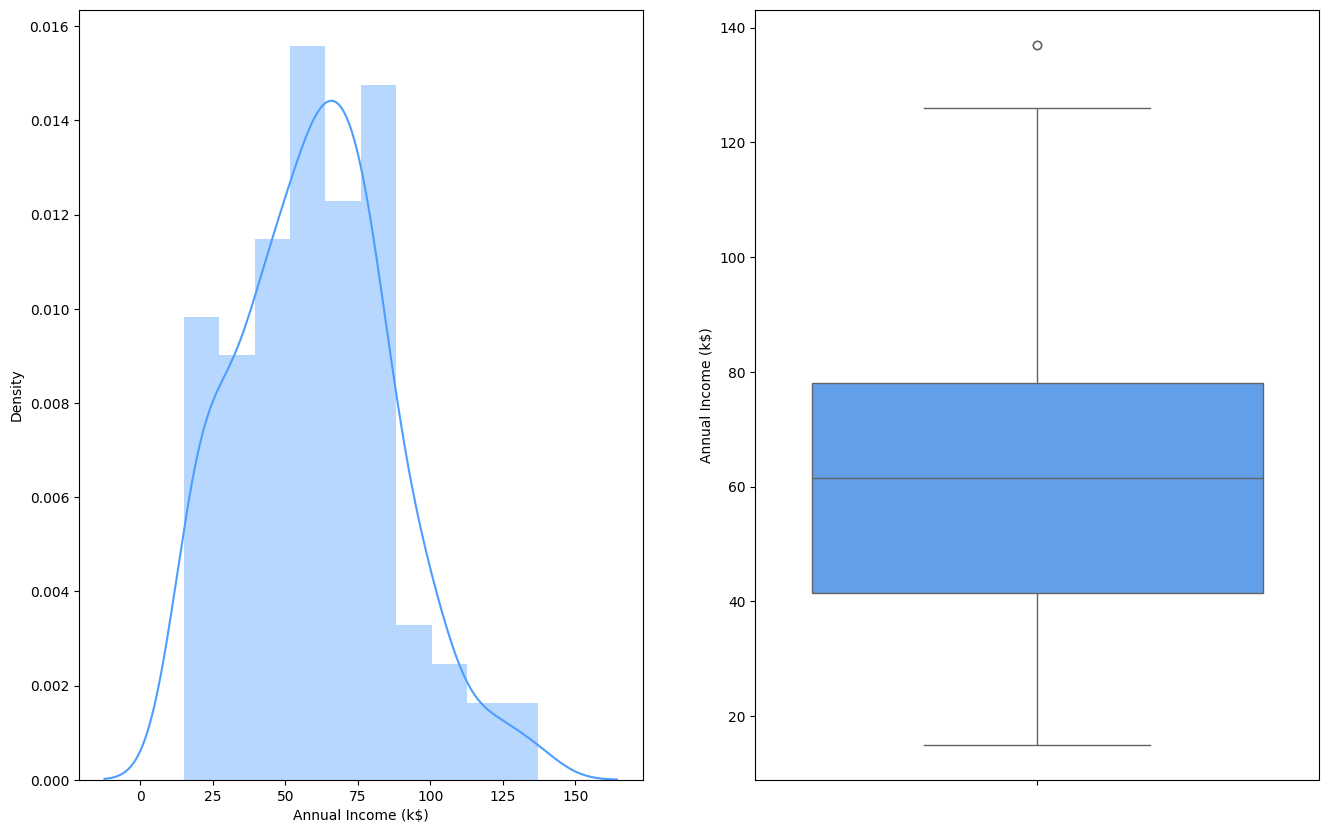

In [41]:
get_dist_numeric('Annual Income (k$)', customer_data)

The distribution of Annual Income (k$) is approximately normal. Notice that there is one point whose value is much larger than the mean. It can be regarded as an outlier. 

<div style="font-size: 20px"><b>Input Variable Scales</b></div>

The input variables have different units. We will want to normal the features so they have the effect when dividing the data points into clusters.

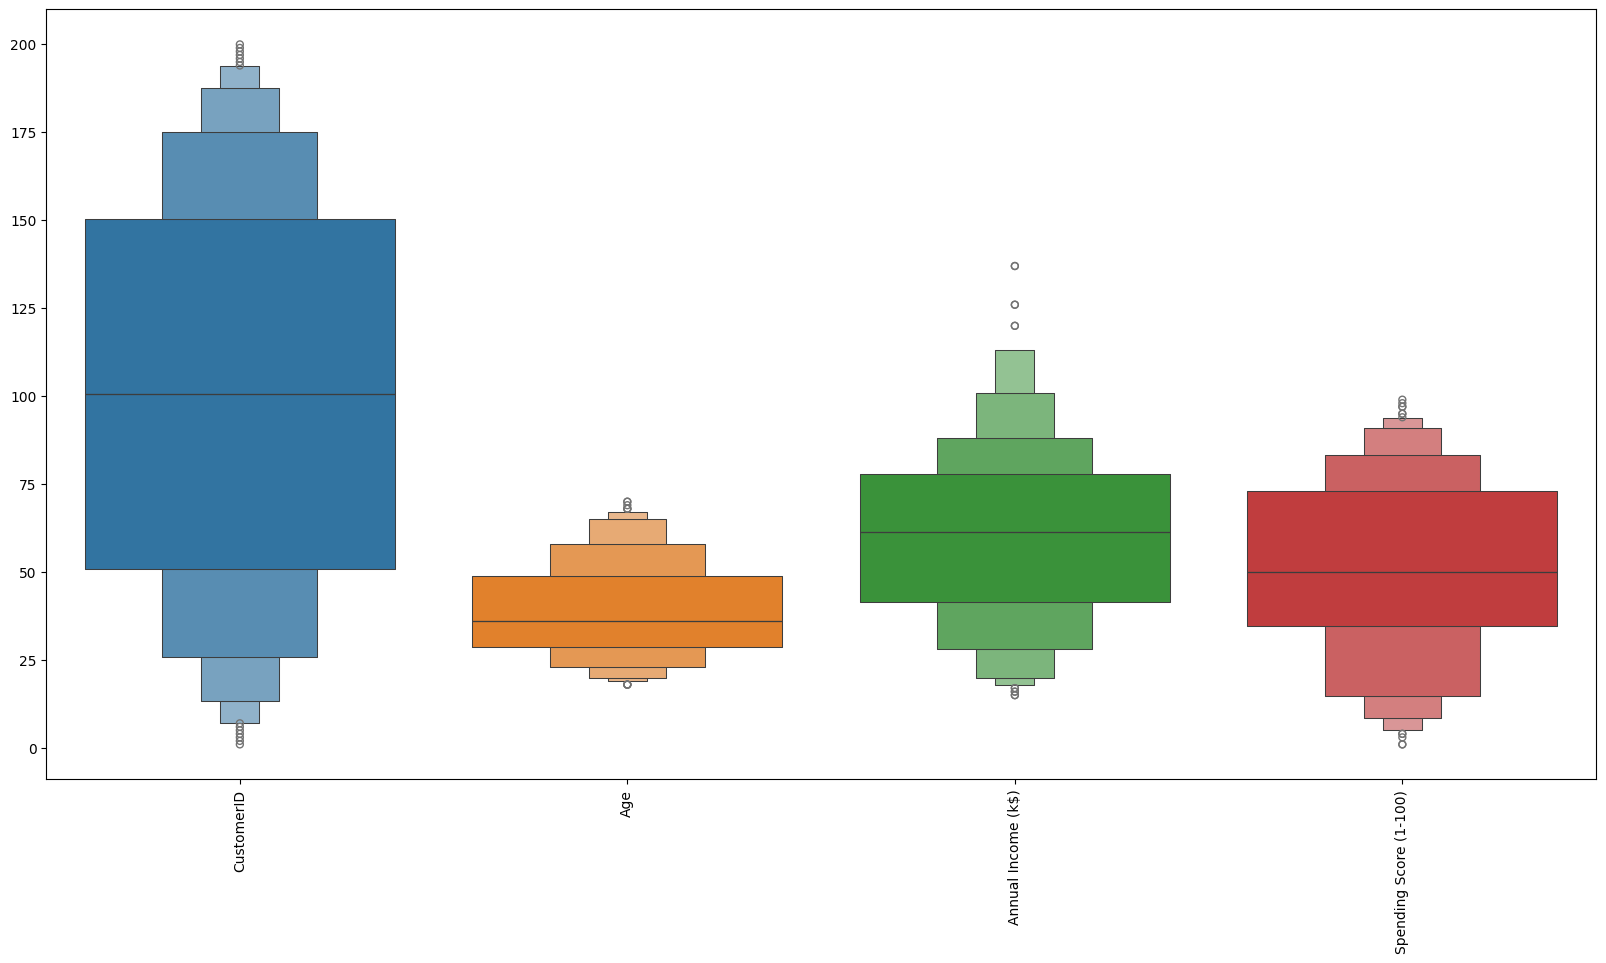

In [14]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = customer_data)
plt.xticks(rotation=90)
plt.show()